</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#ознакомимся-со-столбцами-и-поймем-значение-каждого-из-них" data-toc-modified-id="ознакомимся-со-столбцами-и-поймем-значение-каждого-из-них-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>ознакомимся со столбцами и поймем значение каждого из них</a></span></li><li><span><a href="#проверим-корректность-расчета-эффективности-восстановления-золота" data-toc-modified-id="проверим-корректность-расчета-эффективности-восстановления-золота-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>проверим корректность расчета эффективности восстановления золота</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#концентрации-элементов-на-каждом-этапе" data-toc-modified-id="концентрации-элементов-на-каждом-этапе-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>концентрации элементов на каждом этапе</a></span></li><li><span><a href="#суммарные-концентрации:" data-toc-modified-id="суммарные-концентрации:-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>суммарные концентрации:</a></span></li><li><span><a href="#Обработка-аномалий" data-toc-modified-id="Обработка-аномалий-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обработка аномалий</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#обычное-решающее-дерево" data-toc-modified-id="обычное-решающее-дерево-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>обычное решающее дерево</a></span></li></ul></li><li><span><a href="#Проверка" data-toc-modified-id="Проверка-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка</a></span><ul class="toc-item"><li><span><a href="#Модель-случайного-леса-с-расчитанными-параметрами-на-тестовой" data-toc-modified-id="Модель-случайного-леса-с-расчитанными-параметрами-на-тестовой-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Модель случайного леса с расчитанными параметрами на тестовой</a></span></li><li><span><a href="#модель-отвечающая-средним-значением" data-toc-modified-id="модель-отвечающая-средним-значением-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>модель отвечающая средним значением</a></span></li></ul></li><li><span><a href="#Итоговый-вывод:" data-toc-modified-id="Итоговый-вывод:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоговый вывод:</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

### Цели работы:
* Используя данные с параметрами добычи и очистки подготовить прототип модели машинного обучения предсказывающей коэффициент восстановления золота из золотосодержащей руды

### Ход работы:

* Подготовить данные
* Провести исследовательский анализ данных
* Построить и обучить модель
* Проверка лучшей модели
* Выводы

### Описание данных

Технологический процесс
* Rougher feed — исходное сырье
* Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
* Xanthate **— ксантогенат (промотер, или активатор флотации);
* Sulphate — сульфат (на данном производстве сульфид натрия);
* Depressant — депрессант (силикат натрия).
* Rougher process (англ. «грубый процесс») — флотация
* Rougher tails — отвальные хвосты
* Float banks — флотационная установка
* Cleaner process — очистка
* Rougher Au — черновой концентрат золота
* Final Au — финальный концентрат золота

## Подготовка данных

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, mean_absolute_error

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import StandardScaler
from tqdm import tqdm


In [3]:
train = pd.read_csv('C:\\Users\\Freo\\Desktop\\projects\\datasets\\p8\\gold_industry_train.csv')
test = pd.read_csv('C:\\Users\\Freo\\Desktop\\projects\\datasets\\p8\\gold_industry_test.csv')
full = pd.read_csv('C:\\Users\\Freo\\Desktop\\projects\\datasets\\p8\\gold_industry_full.csv')

In [4]:
display(train)

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14574,2017-12-09 09:59:59,4.599524,5.822083,4.255546,37.480479,559.895089,85.247019,6.775864,9.005425,1200.454685,...,0.000000,47.765393,2.925574,10.855586,7.053796,64.054699,1.761994,8.578502,3.365823,10.603464
14575,2017-12-09 10:59:59,4.658125,5.844800,4.241564,37.395565,561.464855,83.860651,6.770561,9.000889,1200.958146,...,0.000000,46.956275,3.076566,11.542302,6.929418,68.643324,1.567363,8.792890,3.120351,10.184715
14576,2017-12-09 11:59:59,5.335862,6.091855,4.617558,37.369774,560.889077,85.718304,7.762770,9.158609,1199.245914,...,0.000000,46.713954,3.224920,11.356233,6.803482,73.755150,1.529220,8.769645,3.141541,10.403181
14577,2017-12-09 12:59:59,4.838619,6.121323,4.144989,38.591551,559.031805,119.499241,7.356687,9.304952,1196.569267,...,0.000000,46.866780,3.195978,11.349355,6.862249,69.049291,1.612542,8.897321,3.130493,10.549470


сделаем дату индексами для того что можно было при необходимость обьединять таблицы по дате, для заполнения пропусков или присоединения столбцов

In [5]:
train = pd.read_csv('C:\\Users\\Freo\\Desktop\\projects\\datasets\\p8\\gold_industry_train.csv', index_col='date', parse_dates=True)
test = pd.read_csv('C:\\Users\\Freo\\Desktop\\projects\\datasets\\p8\\gold_industry_test.csv', index_col='date', parse_dates=True)
full = pd.read_csv('C:\\Users\\Freo\\Desktop\\projects\\datasets\\p8\\gold_industry_full.csv', index_col='date', parse_dates=True)

In [6]:
display(train)

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,-400.074028,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,-400.200179,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,-399.752729,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-09 09:59:59,4.599524,5.822083,4.255546,37.480479,559.895089,85.247019,6.775864,9.005425,1200.454685,-300.012582,...,0.000000,47.765393,2.925574,10.855586,7.053796,64.054699,1.761994,8.578502,3.365823,10.603464
2017-12-09 10:59:59,4.658125,5.844800,4.241564,37.395565,561.464855,83.860651,6.770561,9.000889,1200.958146,-300.013649,...,0.000000,46.956275,3.076566,11.542302,6.929418,68.643324,1.567363,8.792890,3.120351,10.184715
2017-12-09 11:59:59,5.335862,6.091855,4.617558,37.369774,560.889077,85.718304,7.762770,9.158609,1199.245914,-300.845518,...,0.000000,46.713954,3.224920,11.356233,6.803482,73.755150,1.529220,8.769645,3.141541,10.403181


### ознакомимся со столбцами

индекс | название столбца | что означает
---|---|---
 0  | final.output.concentrate_ag                        | финал - выход конццентрация - серебро
 1  | final.output.concentrate_pb                        | финал - выход концентрация - свинец
 2  |  final.output.concentrate_sol                      | финал - выход концентрация - раствор? (примеси)
 3  |  final.output.concentrate_au                       | финал - выход концентрация - золото
 4  |  final.output.recovery                             | финал - эффективность восстановления - золото
 5  |  final.output.tail_ag                              | финал - хвосты - серебро
 6  |  final.output.tail_pb                              | финал - хвосты - свинец
 7  |  final.output.tail_sol                             | финал - хвосты - раствор? (примеси)
 8  |  final.output.tail_au                              | финал - хвосты - золото
 9  |  primary_cleaner.input.sulfate                     | ПЭО - вход  сульфат
 10 |  primary_cleaner.input.depressant                  | ПЭО - вход - депресант
 11 | primary_cleaner.input.feed_size                    | ПЭО - вход - размер
 12 | primary_cleaner.input.xanthate                     | ПЭО - вход - ксантогенат
 13 | primary_cleaner.output.concentrate_ag              | ПЭО - выход - концентрация - серебро
 14 | primary_cleaner.output.concentrate_pb              | ПЭО - выход - концентрация - свинец
 15 | primary_cleaner.output.concentrate_sol             | ПЭО - выход - концентрация - раствор? (примеси)
 16 | primary_cleaner.output.concentrate_au              | ПЭО - выход - концентрация - золото
 17 | primary_cleaner.output.tail_ag                     | ПЭО - выход - концентрация хвосты - серебро
 18 | primary_cleaner.output.tail_pb                     | ПЭО - выход - концентрация хвосты - свинец
 19 | primary_cleaner.output.tail_sol                    | ПЭО - выход - концентрация хвосты - раствор? (примеси)
 20 | primary_cleaner.output.tail_au                     | ПЭО - выход - концентрация хвосты - золото
 21 | primary_cleaner.state.floatbank8_a_air             | ПЭО - параметры установки 8 - А - обьем воздуха
 22 | primary_cleaner.state.floatbank8_a_level           | ПЭО - параметры установки 8 - А - уровень жидкости
 23 | primary_cleaner.state.floatbank8_b_air             | ПЭО - параметры установки 8 - b - обьем воздуха
 24 | primary_cleaner.state.floatbank8_b_level           | ПЭО - параметры установки 8 - b - уровень жидкости
 25 | primary_cleaner.state.floatbank8_c_air             | ПЭО - параметры установки 8 - c - обьем воздуха
 26 | primary_cleaner.state.floatbank8_c_level           | ПЭО - параметры установки 8 - c - уровень жидкости
 27 | primary_cleaner.state.floatbank8_d_air             | ПЭО - параметры установки 8 - d - обьем воздуха
 28 | primary_cleaner.state.floatbank8_d_level           | ПЭО - параметры установки 8 - d - уровень жидкости
 29 | rougher.calculation.sulfate_to_au_concentrate      | флотация - расчеты - сульфат к золоту -концентрация
 30 | rougher.calculation.floatbank10_sulfate_to_au_feed | флотация - расчеты - установка10 - сульфакт к золоту(сырье)
 31 | rougher.calculation.floatbank11_sulfate_to_au_feed | флотация - расчеты установка11 - сульфакт к золоту(сырье)
 32 | rougher.calculation.au_pb_ratio                    | флотация - расчеты - золото и свинец - отношение
 33 | rougher.input.feed_ag                              | флотация - вход - сырье концентрация - серебро
 34 | rougher.input.feed_pb                              | флотация - вход - сырье концентрация - свинец
 35 | rougher.input.feed_rate                            | флотация - вход - сырье концентрация - скорость подачи
 36 | rougher.input.feed_size                            | флотация - вход - сырье концентрация - размер
 37 | rougher.input.feed_sol                             | флотация - вход - сырье концентрация - раствор? (примеси)
 38 | rougher.input.feed_au                              | флотация - вход - сырье концентрация - золото
 39 | rougher.input.floatbank10_sulfate                  | флотация - вход - установка10 - сульфат
 40 | rougher.input.floatbank10_xanthate                 | флотация - вход - установка10 - ксантогенат
 41 | rougher.input.floatbank11_sulfate                  | флотация - вход - установка11 - сульфат
 42 | rougher.input.floatbank11_xanthate                 | флотация - вход - установка10 - ксантогенат
 43 | rougher.output.concentrate_ag                      | флотация - выход - концентрация - серебро
 44 | rougher.output.concentrate_pb                      | флотация - выход - концентрация - свинец
 45 | rougher.output.concentrate_sol                     | флотация - выход - концентрация - раствор? (примеси)
 46 | rougher.output.concentrate_au                      | флотация - выход - концентрация - золото
 47 | rougher.output.recovery                            | флотация - эффективность восстановления - золото
 48 | rougher.output.tail_ag                             | флотация - хвосты - серебро
 49 | rougher.output.tail_pb                             | флотация - хвосты - свинец
 50 | rougher.output.tail_sol                            | флотация - хвосты - раствор? (примеси)
 51 | rougher.output.tail_au                             | флотация - хвосты - золото
 52 | rougher.state.floatbank10_a_air                    | флотация - параметры установки 10 - А - обьем воздуха
 53 | rougher.state.floatbank10_a_level                  | флотация - параметры установки 10 - А - уровень жидкости
 54 | rougher.state.floatbank10_b_air                    | флотация - параметры установки 10 - B - обьем воздуха
 55 | rougher.state.floatbank10_b_level                  | флотация - параметры установки 10 - B - уровень жидкости
 56 | rougher.state.floatbank10_c_air                    | флотация - параметры установки 10 - C - обьем воздуха
 57 | rougher.state.floatbank10_c_level                  | флотация - параметры установки 10 - C - уровень жидкости
 58 | rougher.state.floatbank10_d_air                    | флотация - параметры установки 10 - D - обьем воздуха
 59 | rougher.state.floatbank10_d_level                  | флотация - параметры установки 10 - D - уровень жидкости
 60 | rougher.state.floatbank10_e_air                    | флотация - параметры установки 10 - E - обьем воздуха
 61 | rougher.state.floatbank10_e_level                  | флотация - параметры установки 10 - E - уровень жидкости
 62 | rougher.state.floatbank10_f_air                    | флотация - параметры установки 10 - F - обьем воздуха
 63 | rougher.state.floatbank10_f_level                  | флотация - параметры установки 10 - F - уровень жидкости
 64 | secondary_cleaner.output.tail_ag                   | ВЭО - выход - хвосты - серебро
 65 | secondary_cleaner.output.tail_pb                   | ВЭО - выход - хвосты - свинец
 66 | secondary_cleaner.output.tail_sol                  | ВЭО - выход - хвосты - раствор? (примеси)
 67 | secondary_cleaner.output.tail_au                   | ВЭО - выход - хвосты - золото
 68 | secondary_cleaner.state.floatbank2_a_air           | ВЭО - параметры установки 2 - А - обьем воздуха
 69 | secondary_cleaner.state.floatbank2_a_level         | ВЭО - параметры установки 2 - А - уровень жидкости
 70 | secondary_cleaner.state.floatbank2_b_air           | ВЭО - параметры установки 2 - B - обьем воздуха
 71 | secondary_cleaner.state.floatbank2_b_level         | ВЭО - параметры установки 2 - B - уровень жидкости
 72 | secondary_cleaner.state.floatbank3_a_air           | ВЭО - параметры установки 3 - A - обьем воздуха
 73 | secondary_cleaner.state.floatbank3_a_level         | ВЭО - параметры установки 3 - A - уровень жидкости
 74 | secondary_cleaner.state.floatbank3_b_air           | ВЭО - параметры установки 3 - B - обьем воздуха
 75 | secondary_cleaner.state.floatbank3_b_level         | ВЭО - параметры установки 3 - B - уровень жидкости
 76 | secondary_cleaner.state.floatbank4_a_air           | ВЭО - параметры установки 4 - А - обьем воздуха
 77 | secondary_cleaner.state.floatbank4_a_level         | ВЭО - параметры установки 4 - А - жидкости
 78 | secondary_cleaner.state.floatbank4_b_air           | ВЭО - параметры установки 4 - B - обьем воздуха
 79 | secondary_cleaner.state.floatbank4_b_level         | ВЭО - параметры установки 4 - B - жидкости
 80 | secondary_cleaner.state.floatbank5_a_air           | ВЭО - параметры установки 5 - А - обьем воздуха
 81 | secondary_cleaner.state.floatbank5_a_level         | ВЭО - параметры установки 5 - А - уровень жидкости
 82 | secondary_cleaner.state.floatbank5_b_air           | ВЭО - параметры установки 5 - B - обьем воздуха
 83 | secondary_cleaner.state.floatbank5_b_level         | ВЭО - параметры установки 5 - B - уровень жидкости
 84 | secondary_cleaner.state.floatbank6_a_air           | ВЭО - параметры установки 6 - А - обьем воздуха
 85 | secondary_cleaner.state.floatbank6_a_level         | ВЭО - параметры установки 6 - А - уровень жидкости

### проверим корректность расчета эффективности восстановления золота

In [7]:
C = train['final.output.concentrate_au']
F = train['rougher.input.feed_au'] 
T = train['final.output.tail_au']

In [8]:
train['rec'] = ((C * (F - T)) / (F * (C - T))) * 100

In [9]:
mean_absolute_error(train['rec'], train['final.output.recovery'])

8.569602032360358e-15

погрешность минимальна, все ок

оценим количество пропусков

In [10]:
train.isna().sum()

rougher.input.feed_au       0
rougher.input.feed_ag       0
rougher.input.feed_pb      72
rougher.input.feed_sol     77
rougher.input.feed_rate     7
                           ..
final.output.tail_au        0
final.output.tail_ag        1
final.output.tail_pb       75
final.output.tail_sol       5
rec                         0
Length: 87, dtype: int64

In [11]:
test.isna().sum()

rougher.input.feed_au                           0
rougher.input.feed_ag                           0
rougher.input.feed_pb                          28
rougher.input.feed_sol                         22
rougher.input.feed_rate                         4
rougher.input.feed_size                        44
rougher.input.floatbank10_sulfate               3
rougher.input.floatbank10_xanthate              1
rougher.state.floatbank10_a_air                 1
rougher.state.floatbank10_a_level               1
rougher.state.floatbank10_b_air                 1
rougher.state.floatbank10_b_level               1
rougher.state.floatbank10_c_air                 1
rougher.state.floatbank10_c_level               1
rougher.state.floatbank10_d_air                 0
rougher.state.floatbank10_d_level               0
rougher.state.floatbank10_e_air                 7
rougher.state.floatbank10_e_level               0
rougher.state.floatbank10_f_air                 0
rougher.state.floatbank10_f_level               0


посмотрим на значения в столбцах, которых есть пропуски

In [12]:
a = train.isna().sum()
testlist = a.index
absent = []
for el in testlist:
    if a[el] != 0:
        absent.append(el)

In [13]:
for el in absent:
    print(train[el].describe())

count    14507.000000
mean         3.604221
std          1.056063
min          0.010000
25%          2.880490
50%          3.532399
75%          4.257282
max          7.052325
Name: rougher.input.feed_pb, dtype: float64
count    14502.000000
mean        36.561420
std          5.209823
min          0.010000
25%         34.093951
50%         37.097511
75%         39.899799
max         53.475325
Name: rougher.input.feed_sol, dtype: float64
count    14572.000000
mean       474.332784
std        108.503552
min          0.002986
25%        411.048483
50%        498.187968
75%        549.586552
max        717.508837
Name: rougher.input.feed_rate, dtype: float64
count    14478.000000
mean        58.922712
std         22.407410
min          0.049194
25%         47.278490
50%         54.361187
75%         64.464926
max        484.967466
Name: rougher.input.feed_size, dtype: float64
count    14548.000000
mean        12.427399
std          3.428939
min          0.001083
25%         10.002832
50%  

In [14]:
for el in absent:
    print(train[el].head(20))

date
2016-01-15 00:00:00    2.284912
2016-01-15 01:00:00    2.266033
2016-01-15 02:00:00    2.159622
2016-01-15 03:00:00    2.037807
2016-01-15 04:00:00    1.786875
2016-01-15 05:00:00    1.879351
2016-01-15 06:00:00    2.105501
2016-01-15 07:00:00    2.310432
2016-01-15 08:00:00    2.391713
2016-01-15 09:00:00    2.539114
2016-01-15 10:00:00    2.388039
2016-01-15 11:00:00    2.307925
2016-01-15 12:00:00    2.673614
2016-01-15 13:00:00    2.684098
2016-01-15 14:00:00    2.777324
2016-01-15 15:00:00    2.914109
2016-01-15 16:00:00    2.834492
2016-01-15 17:00:00    2.525838
2016-01-15 18:00:00    1.800531
2016-01-15 19:00:00    1.348571
Name: rougher.input.feed_pb, dtype: float64
date
2016-01-15 00:00:00    36.808594
2016-01-15 01:00:00    35.753385
2016-01-15 02:00:00    35.971630
2016-01-15 03:00:00    36.862241
2016-01-15 04:00:00    34.347666
2016-01-15 05:00:00    35.470082
2016-01-15 06:00:00    34.920570
2016-01-15 07:00:00    36.091386
2016-01-15 08:00:00    35.753879
2016-01-1

соседние ячейки (близкие по времени) очень мало отличаются по значениям, можно заполнить пропуски по значениям соседних

In [15]:
train = train.fillna(method = 'ffill')
test = test.fillna(method = 'ffill')

C:\Users\Freo\AppData\Local\Temp\ipykernel_29496\2102709627.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train = train.fillna(method = 'ffill')
C:\Users\Freo\AppData\Local\Temp\ipykernel_29496\2102709627.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test = test.fillna(method = 'ffill')


удалим дубли

In [16]:
print(train.duplicated().sum(), test.duplicated().sum(), full.duplicated().sum())

0 0 0


Итог шага:
На данном этапе работы мы загрузили, просмотрели и подготовили данные:
* изменили индексацию в датафремайх на индексацию по дате, чтобы иметь возможность обьединить таблицы, и взять нужные столбцы из итоговой (при необходимости)
* оценили пропуски и их разброс, заметили закономерность что все ближайшие значения очень близки друг к другу что позволило нам заполнить пропуски ближайшими значениями
* проверили на дубликаты

## Анализ данных

### концентрации элементов на каждом этапе

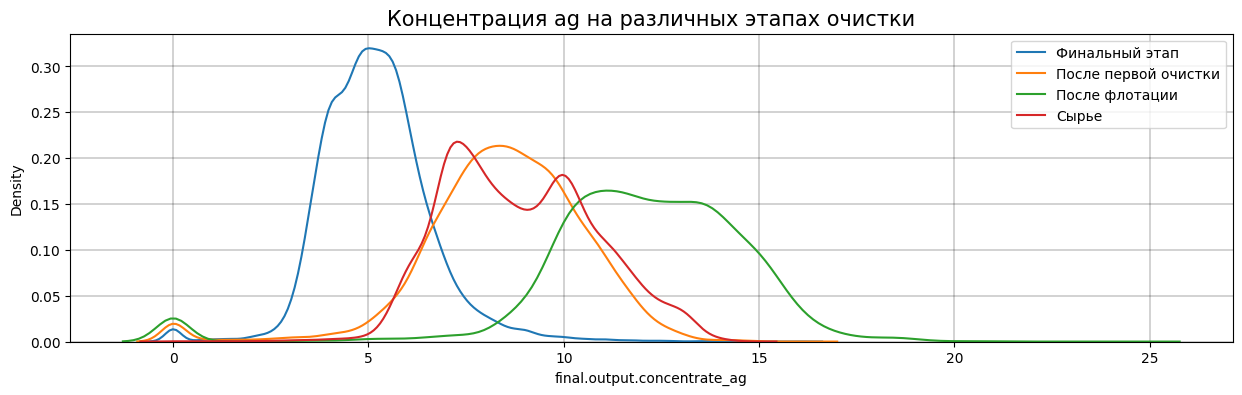

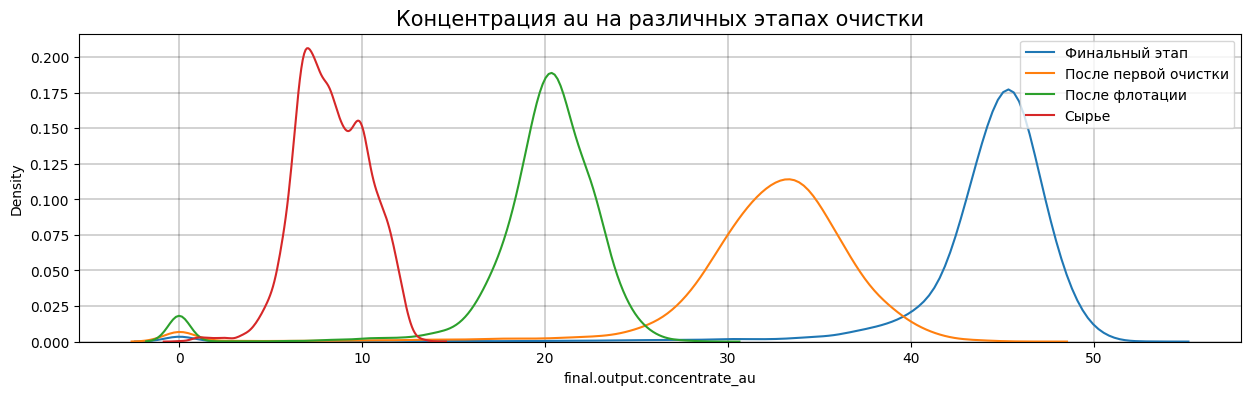

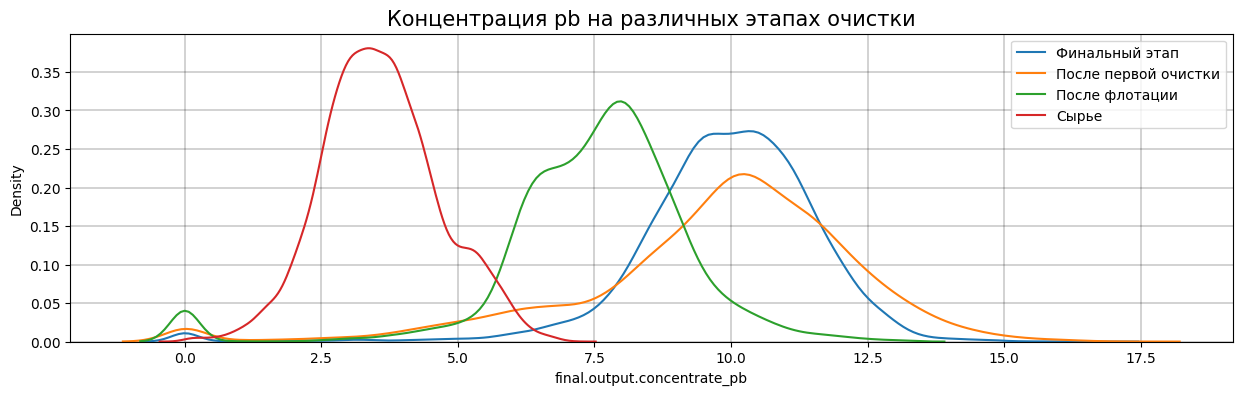

In [17]:
legend = ['Финальный этап','После первой очистки','После флотации','Сырье', 'Хвосты]']
for elem in ['ag', 'au', 'pb']:
    exec(f"plt.figure(figsize=(15, 4))\n"
        f"plt.title('Концентрация {elem} на различных этапах очистки', fontsize=15) \n"
        f"sns.kdeplot(data=train['final.output.concentrate_{elem}']) \n"
        f"sns.kdeplot(data=train['primary_cleaner.output.concentrate_{elem}']) \n"
        f"sns.kdeplot(data=train['rougher.output.concentrate_{elem}']) \n"
        f"sns.kdeplot(data=train['rougher.input.feed_{elem}']) \n"
        #f"sns.kdeplot(data=train['secondary_cleaner.output.tail_{elem}']) \n"
        f"plt.grid(which='major', color = 'k', linewidth = 0.25)\n"
        f"ax = plt.subplot()\n"
        f"ax.legend(legend)\n")

In [18]:
train['rougher.input.feed_size'].describe()

count    14579.000000
mean        59.070865
std         22.903811
min          0.049194
25%         47.322462
50%         54.464259
75%         64.469177
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [19]:
test['rougher.input.feed_size'].describe()

count    4860.000000
mean       59.136150
std        19.512497
min         0.046369
25%        47.610795
50%        55.461058
75%        66.538910
max       363.989699
Name: rougher.input.feed_size, dtype: float64

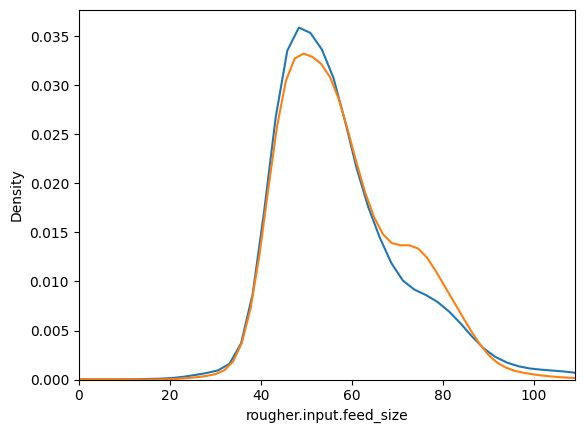

In [20]:
plt.xlim(0, train['rougher.input.feed_size'].median()*2)
sns.kdeplot(data=train['rougher.input.feed_size'], label = 'Размер гранул на тренировочной выборке')
sns.kdeplot(data=test['rougher.input.feed_size'], label = 'Размер гранул на тестовой выборке')
plt.show()

### суммарные концентрации:

In [21]:
full_copy = full.copy(deep=False)

In [22]:
rougher_input = []
rougher_output = []
primary_output = []
final_output = []
tail_output = []
for col in full_copy.columns:
    if 'rougher.input.feed_' in col and len(col) != 23:
        rougher_input.append(col)
    elif 'rougher.output.concentrate_' in col:
        rougher_output.append(col)
    elif 'primary_cleaner.output.concentrate_' in col:
        primary_output.append(col)
    elif 'final.output.concentrate_' in col:
        final_output.append(col)
    elif 'secondary_cleaner.output.tail_' in col:
        tail_output.append(col)

In [23]:
full_copy['rougher.input.sum'] = full_copy[rougher_input].sum(axis=1)
full_copy['rougher.output.sum'] = full_copy[rougher_output].sum(axis=1)
full_copy['primary.output.sum'] = full_copy[primary_output].sum(axis=1)
full_copy['final.output.sum'] = full_copy[final_output].sum(axis=1)
full_copy['tail_output.sum'] = full_copy[tail_output].sum(axis=1)

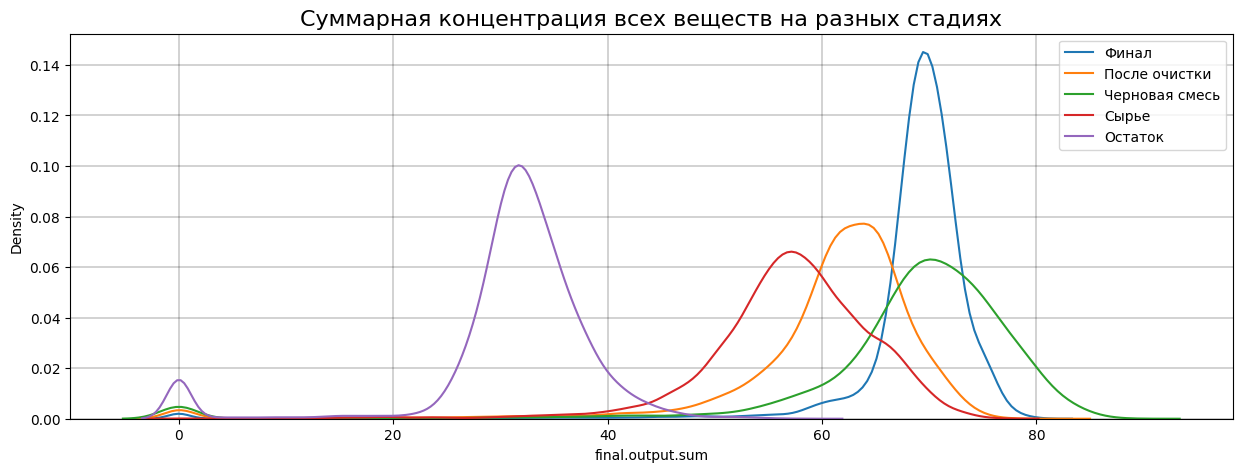

In [24]:
legend = ['Финал','После очистки','Черновая смесь', 'Cырье', 'Остаток']
plt.figure(figsize=(15, 5))
plt.title('Суммарная концентрация всех веществ на разных стадиях', fontsize=16)
#plt.xlim(20, 95)
sns.kdeplot(data=full_copy['final.output.sum'])
sns.kdeplot(data=full_copy['primary.output.sum'])
sns.kdeplot(data=full_copy['rougher.output.sum'])
sns.kdeplot(data=full_copy['rougher.input.sum'])
sns.kdeplot(data=full_copy['tail_output.sum'])

plt.grid(which='major', color = 'k', linewidth = 0.25)
ax = plt.subplot()
ax.legend(legend)
plt.show()

### Обработка аномалий

удалим аномалии в районе нуля на тренировочной выборке и полной выборках, судя по графика границу аномалий для серебра и золота можно выбрать равной 2, а для свинца 0.7

In [25]:
for dataset in ['full_copy', 'train']:
    for elem in ['ag', 'au', 'pb']:
        if elem == 'ag' or elem == 'au':
            thr = 2
        else:
            thr = 0.7


        exec(f"{dataset} = {dataset}[{dataset}['final.output.concentrate_{elem}'] > {thr}] \n"
        f"{dataset} = {dataset}[{dataset}['primary_cleaner.output.concentrate_{elem}'] > {thr}]\n"
        f"{dataset} = {dataset}[{dataset}['rougher.output.concentrate_{elem}'] > {thr}]\n"
        f"{dataset} = {dataset}[{dataset}['rougher.input.feed_{elem}'] > {thr}]\n"
        f"{dataset} = {dataset}[{dataset}['secondary_cleaner.output.tail_{elem}'] > {thr}]\n")

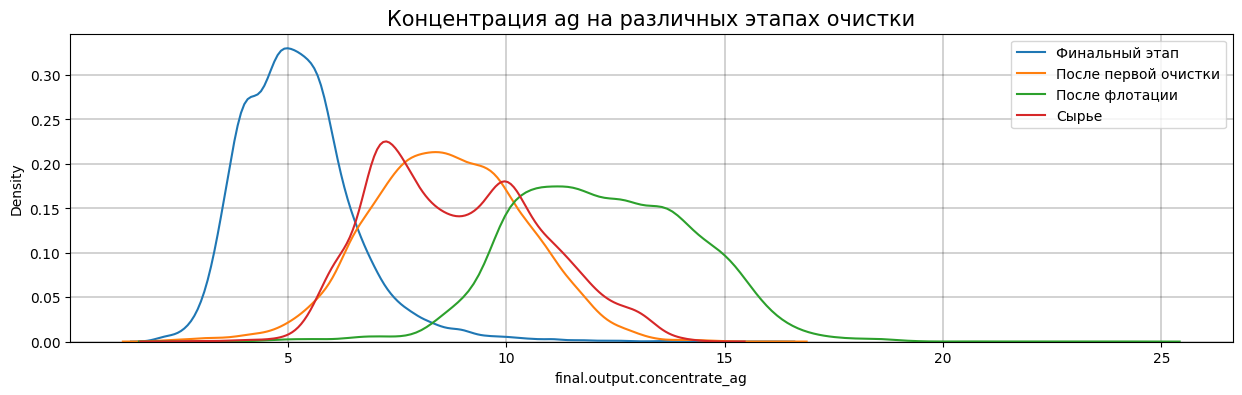

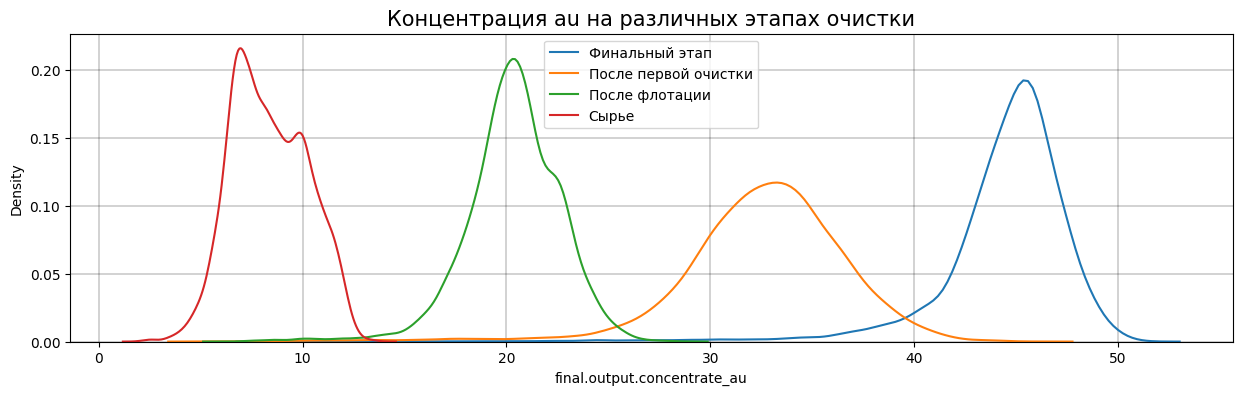

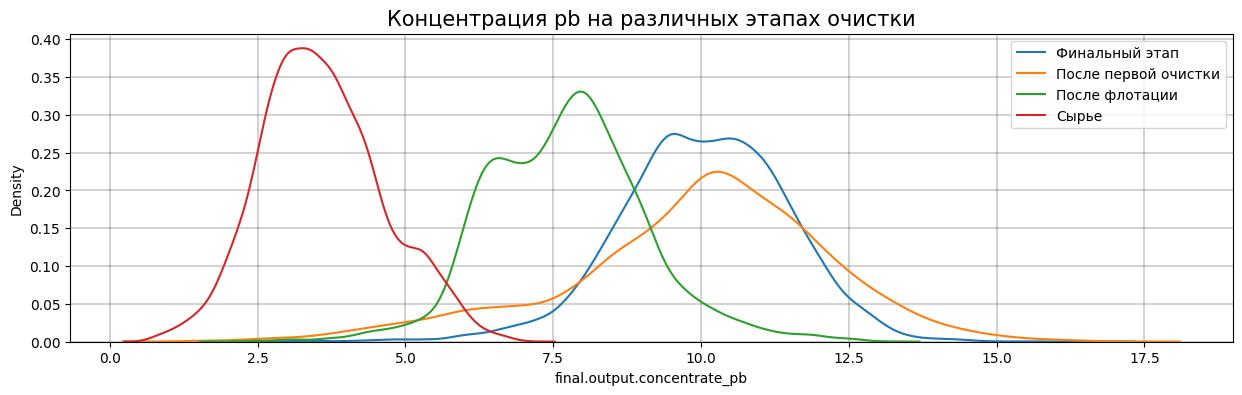

In [26]:
legend = ['Финальный этап','После первой очистки','После флотации','Сырье', 'Хвосты']
for elem in ['ag', 'au', 'pb']:
    exec(f"plt.figure(figsize=(15, 4))\n"
        f"plt.title('Концентрация {elem} на различных этапах очистки', fontsize=15) \n"
        f"sns.kdeplot(data=train['final.output.concentrate_{elem}']) \n"
        f"sns.kdeplot(data=train['primary_cleaner.output.concentrate_{elem}']) \n"
        f"sns.kdeplot(data=train['rougher.output.concentrate_{elem}']) \n"
        f"sns.kdeplot(data=train['rougher.input.feed_{elem}']) \n"
        #f"sns.kdeplot(data=train['secondary_cleaner.output.tail_{elem}']) \n"
        f"plt.grid(which='major', color = 'k', linewidth = 0.25)\n"
        f"ax = plt.subplot()\n"
        f"ax.legend(legend)\n")


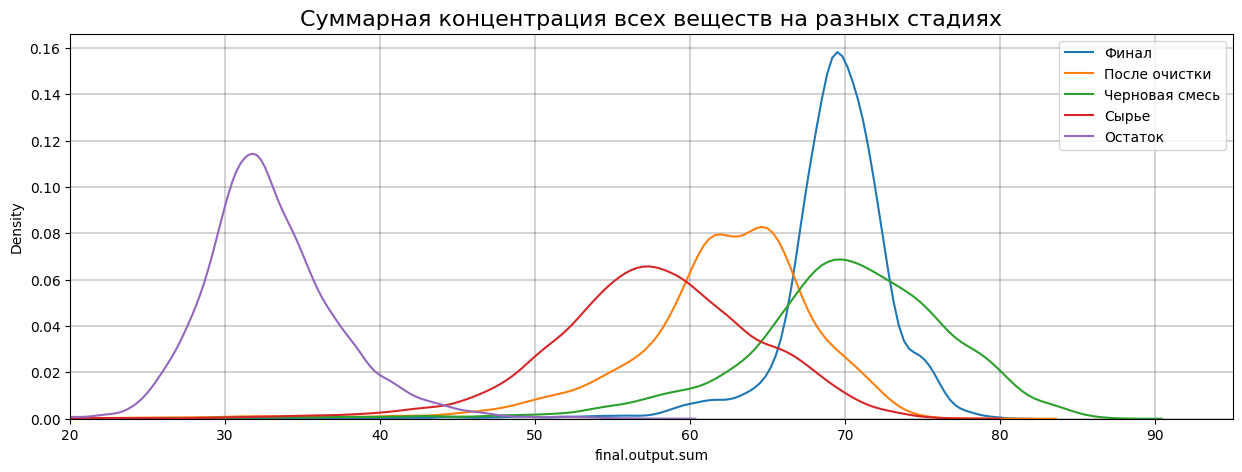

In [27]:
legend = ['Финал','После очистки','Черновая смесь', 'Cырье', 'Остаток']
plt.figure(figsize=(15, 5))
plt.title('Суммарная концентрация всех веществ на разных стадиях', fontsize=16)
plt.xlim(20, 95)
sns.kdeplot(data=full_copy['final.output.sum'])
sns.kdeplot(data=full_copy['primary.output.sum'])
sns.kdeplot(data=full_copy['rougher.output.sum'])
sns.kdeplot(data=full_copy['rougher.input.sum'])
sns.kdeplot(data=full_copy['tail_output.sum'])

plt.grid(which='major', color = 'k', linewidth = 0.25)
ax = plt.subplot()
ax.legend(legend)
plt.show()

Итог шага:
* исследовали концентрацию каждого вещества на разных этапах очистки визуализировав на графике
* исследовали суммарные концентрацию веществ на разных этапах визуализировав на графике
* заметили аномальные отклонения около нуля, удалили их

## Модель

In [28]:
def smape(target, predictions):
    smape = (1/len(target) * np.sum(2 * np.abs(target - predictions) / (np.abs(target) + (np.abs(predictions)))) * 100)
    return smape

In [29]:
def smape_result(rougher, final):
    total_sMape = 0.25 * rougher + 0.75 * final
    return total_sMape

In [30]:
smape_score = make_scorer(smape, greater_is_better=False)

In [31]:
in_test = test.columns

In [32]:
X_TRAIN = train[in_test]

In [33]:
Y_TRAIN_FLOT = train['rougher.output.recovery']
Y_TRAIN_FINAL = train['final.output.recovery']

In [34]:
X_TEST = test.copy(deep=False)

In [35]:
test = test.merge(full[['rougher.output.recovery', 'final.output.recovery']], on='date', how='left')

In [36]:
Y_TEST_FLOT = test['rougher.output.recovery']
Y_TEST_FINAL = test['final.output.recovery']

In [37]:
STATE = 12345

### Случайный лес 

In [38]:
for depth in tqdm(range(4,10,1)):
    model_rf_flot = RandomForestRegressor(max_depth=depth, random_state=STATE)
    print(abs(cross_val_score(model_rf_flot, X_TRAIN, Y_TRAIN_FLOT, cv=5, scoring=smape_score).mean()), depth)


 17%|█▋        | 1/6 [01:26<07:13, 86.70s/it]

6.503625111874447 4


 33%|███▎      | 2/6 [03:13<06:34, 98.60s/it]

6.483178202731802 5


 50%|█████     | 3/6 [05:19<05:32, 110.84s/it]

6.463421575537318 6


 67%|██████▋   | 4/6 [07:41<04:06, 123.45s/it]

6.451040682374375 7


 83%|████████▎ | 5/6 [10:22<02:16, 136.90s/it]

6.464623449520505 8


100%|██████████| 6/6 [13:21<00:00, 133.50s/it]

6.45564856792794 9


лучшая глубина для флот = 5

In [39]:
for estim in tqdm(range(60,111,10)):
    model_rf_flot = RandomForestRegressor(n_estimators=estim, max_depth=5, random_state=STATE)
    print(abs(cross_val_score(model_rf_flot, X_TRAIN, Y_TRAIN_FLOT, cv=5, scoring=smape_score).mean()), 'depth 5, estim', estim )

 17%|█▋        | 1/6 [01:03<05:17, 63.59s/it]

6.559897194252952 depth 5, estim 60


 33%|███▎      | 2/6 [02:17<04:39, 69.83s/it]

6.531858413708275 depth 5, estim 70


 50%|█████     | 3/6 [03:42<03:49, 76.63s/it]

6.548492268891041 depth 5, estim 80


 67%|██████▋   | 4/6 [05:17<02:47, 83.99s/it]

6.488711303581054 depth 5, estim 90


 83%|████████▎ | 5/6 [07:03<01:31, 91.96s/it]

6.483178202731802 depth 5, estim 100


100%|██████████| 6/6 [09:00<00:00, 90.05s/it] 

6.469616092023398 depth 5, estim 110


In [40]:
for estim in tqdm(range(76,84,1)):
    model_rf_flot = RandomForestRegressor(n_estimators=estim, max_depth=5, random_state=STATE)
    print(abs(cross_val_score(model_rf_flot, X_TRAIN, Y_TRAIN_FLOT, cv=5, scoring=smape_score).mean()), 'depth 5, estim', estim )

 12%|█▎        | 1/8 [01:20<09:21, 80.15s/it]

6.5475343356450635 depth 5, estim 76


 25%|██▌       | 2/8 [02:41<08:04, 80.70s/it]

6.552975670973585 depth 5, estim 77


 38%|███▊      | 3/8 [04:03<06:46, 81.40s/it]

6.560019915572122 depth 5, estim 78


 50%|█████     | 4/8 [05:26<05:28, 82.04s/it]

6.553469547823508 depth 5, estim 79


 62%|██████▎   | 5/8 [06:51<04:09, 83.04s/it]

6.548492268891041 depth 5, estim 80


 75%|███████▌  | 6/8 [08:17<02:47, 83.95s/it]

6.53735762771592 depth 5, estim 81


 88%|████████▊ | 7/8 [09:43<01:24, 84.77s/it]

6.534240067788471 depth 5, estim 82


100%|██████████| 8/8 [11:11<00:00, 83.88s/it]

6.525160033800728 depth 5, estim 83


лучшая эстим для флота 80

In [41]:
for depth in tqdm(range(2,8,1)):
    model_rf_final = RandomForestRegressor(max_depth=depth, random_state=STATE)
    print(abs(cross_val_score(model_rf_final, X_TRAIN, Y_TRAIN_FINAL, cv=5, scoring=smape_score).mean()), depth)

 17%|█▋        | 1/6 [00:45<03:47, 45.49s/it]

8.503516260544952 2


 33%|███▎      | 2/6 [01:51<03:49, 57.48s/it]

8.88733395080203 3


 50%|█████     | 3/6 [03:17<03:32, 70.69s/it]

8.92823642338788 4


 67%|██████▋   | 4/6 [05:04<02:49, 84.83s/it]

9.036753098795392 5


 83%|████████▎ | 5/6 [07:10<01:39, 99.68s/it]

9.093699560011467 6


100%|██████████| 6/6 [09:35<00:00, 95.89s/it] 

9.18962224827499 7


лучшая глубина 3

In [42]:
for estim in tqdm(range(50,121,10)):
    model_rf_final = RandomForestRegressor(n_estimators=estim, max_depth=3, random_state=STATE)
    print(abs(cross_val_score(model_rf_final, X_TRAIN, Y_TRAIN_FINAL, cv=5, scoring=smape_score).mean()), 'depth 3, estim', estim )

 12%|█▎        | 1/8 [00:33<03:55, 33.68s/it]

8.787660969858369 depth 3, estim 50


 25%|██▌       | 2/8 [01:13<03:42, 37.03s/it]

8.816638095393298 depth 3, estim 60


 38%|███▊      | 3/8 [01:59<03:26, 41.29s/it]

8.843084833637908 depth 3, estim 70


 50%|█████     | 4/8 [02:51<03:02, 45.71s/it]

8.860459790279643 depth 3, estim 80


 62%|██████▎   | 5/8 [03:50<02:31, 50.52s/it]

8.877232811766143 depth 3, estim 90


 75%|███████▌  | 6/8 [04:56<01:51, 55.59s/it]

8.88733395080203 depth 3, estim 100


 88%|████████▊ | 7/8 [06:08<01:00, 60.97s/it]

8.896546306132059 depth 3, estim 110


100%|██████████| 8/8 [07:27<00:00, 55.92s/it]

8.894174257421378 depth 3, estim 120


In [43]:
for estim in tqdm(range(106,114,1)):
    model_rf_final = RandomForestRegressor(n_estimators=estim, max_depth=3, random_state=STATE)
    print(abs(cross_val_score(model_rf_final, X_TRAIN, Y_TRAIN_FINAL, cv=5, scoring=smape_score).mean()), 'depth 3, estim', estim )

 12%|█▎        | 1/8 [01:09<08:05, 69.29s/it]

8.886576228538699 depth 3, estim 106


 25%|██▌       | 2/8 [02:19<06:58, 69.73s/it]

8.890531012317194 depth 3, estim 107


 38%|███▊      | 3/8 [03:30<05:50, 70.17s/it]

8.891350327566688 depth 3, estim 108


 50%|█████     | 4/8 [04:41<04:42, 70.64s/it]

8.890501303729712 depth 3, estim 109


 62%|██████▎   | 5/8 [05:53<03:33, 71.04s/it]

8.896546306132059 depth 3, estim 110


 75%|███████▌  | 6/8 [07:05<02:23, 71.53s/it]

8.896440230328116 depth 3, estim 111


 88%|████████▊ | 7/8 [08:19<01:12, 72.35s/it]

8.887032386053198 depth 3, estim 112


100%|██████████| 8/8 [09:34<00:00, 71.78s/it]

8.889419295531317 depth 3, estim 113


лучшая на глубине 3 с эстим 110

In [44]:
model_rf_flot = RandomForestRegressor(n_estimators=80, max_depth=5, random_state=STATE)
smape_score_flot = abs(cross_val_score(model_rf_flot, X_TRAIN, Y_TRAIN_FLOT, cv=5, scoring=smape_score))

print('smape flot =', smape_score_flot.mean(), 'при n_estimators = 80, max_depth = 5')

smape flot = 6.548492268891041 при n_estimators = 80, max_depth = 5


In [45]:
model_rf_final = RandomForestRegressor(n_estimators=110, max_depth=3, random_state=STATE)
smape_score_final = abs(cross_val_score(model_rf_final, X_TRAIN, Y_TRAIN_FINAL, cv=5, scoring=smape_score))

print('smape final =', smape_score_final.mean(), 'при n_estimators = 110, max_depth = 3')

smape final = 8.896546306132059 при n_estimators = 110, max_depth = 3


In [46]:
total_smape = smape_result(smape_score_flot.mean(), smape_score_final.mean())
print('total smape на тестовой выборке в крос валидации рандом фореста = ', total_smape)

total smape на тестовой выборке в крос валидации рандом фореста =  8.309532796821804


### Линейная регрессия

проскалируем данные для линейной регрессии

In [47]:
scaler = StandardScaler()

In [48]:
scaler.fit(X_TRAIN)
X_TRAIN_SCALER = scaler.transform(X_TRAIN)
X_TEST_SCALER = scaler.transform(X_TEST)

крос валидация

In [49]:
linear_model = LinearRegression()
smape_score_flot = abs(cross_val_score(linear_model, X_TRAIN_SCALER, Y_TRAIN_FLOT, cv=5, scoring=smape_score))
smape_score_final = abs(cross_val_score(linear_model, X_TRAIN_SCALER, Y_TRAIN_FINAL, cv=5, scoring=smape_score))

print('total smape на тестовой выборки у линейной регрессии',smape_result(smape_score_flot.mean(), smape_score_final.mean()))

total smape на тестовой выборки у линейной регрессии 8.601453161384317


### обычное решающее дерево

In [50]:
for depth in tqdm(range(4,11,1)):
    model_tree_flot = DecisionTreeRegressor(max_depth=depth, random_state=STATE)
    print(abs(cross_val_score(model_tree_flot, X_TRAIN, Y_TRAIN_FLOT, cv=5, scoring=smape_score).mean()), depth)

 14%|█▍        | 1/7 [00:01<00:07,  1.29s/it]

7.10900325462529 4


 29%|██▊       | 2/7 [00:02<00:07,  1.49s/it]

7.2855052093802515 5


 43%|████▎     | 3/7 [00:04<00:06,  1.67s/it]

7.345801649024219 6


 57%|█████▋    | 4/7 [00:06<00:05,  1.87s/it]

7.912479884266443 7


 71%|███████▏  | 5/7 [00:09<00:04,  2.06s/it]

7.975120188830397 8


 86%|████████▌ | 6/7 [00:12<00:02,  2.27s/it]

7.8442781326914615 9


100%|██████████| 7/7 [00:15<00:00,  2.14s/it]

8.29666282568875 10


лучшая глубина 4

In [51]:
for depth in tqdm(range(1,11,1)):
    model_tree_final = DecisionTreeRegressor(max_depth=depth, random_state=STATE)
    print(abs(cross_val_score(model_tree_final, X_TRAIN, Y_TRAIN_FINAL, cv=5, scoring=smape_score).mean()), depth)

 10%|█         | 1/10 [00:00<00:03,  2.64it/s]

9.154322604461395 1


 20%|██        | 2/10 [00:01<00:04,  1.77it/s]

8.86223822616715 2


 30%|███       | 3/10 [00:02<00:05,  1.30it/s]

9.641086015348957 3


 40%|████      | 4/10 [00:03<00:05,  1.01it/s]

9.6267654132978 4


 50%|█████     | 5/10 [00:05<00:06,  1.22s/it]

10.522173504471507 5


 60%|██████    | 6/10 [00:06<00:05,  1.46s/it]

10.27324498908948 6


 70%|███████   | 7/10 [00:09<00:05,  1.69s/it]

10.983164412256546 7


 80%|████████  | 8/10 [00:11<00:03,  1.93s/it]

11.541654545488242 8


 90%|█████████ | 9/10 [00:14<00:02,  2.17s/it]

12.231023974279907 9


100%|██████████| 10/10 [00:17<00:00,  1.73s/it]

12.858756961959596 10


лучшая глубина 2

In [52]:
model_tree_flot = DecisionTreeRegressor(max_depth=4, random_state=STATE)
tree_smape_score_flot = (abs(cross_val_score(model_tree_flot, X_TRAIN, Y_TRAIN_FLOT, cv=5, scoring=smape_score).mean()))

In [53]:
model_tree_final = DecisionTreeRegressor(max_depth=2, random_state=STATE)
tree_smape_score_final = (abs(cross_val_score(model_tree_final, X_TRAIN, Y_TRAIN_FINAL, cv=5, scoring=smape_score).mean()))

In [54]:
print('total smape на тестовой выборки у решающего дерева', smape_result(tree_smape_score_flot.mean(), tree_smape_score_final.mean()))

total smape на тестовой выборки у решающего дерева 8.423929483281686


Лучшие результаты с незначительным отрывом показала модель случайного леса. Проверим ее на тестовой выборки и сравним с моделью предсказывающей средние значения

Итог шага:
* добавили метрику smape
* добавили веса для smape по предсказаниям 2х целевых признаков согласно ТЗ (25% и 75% для предсказаний первичной очистки и финального результата)
* с помощью кросвалидации определили оптимальные параметры для случайного леса на тестовой выборке и оценили общее smape согласно тз
* с помощью кросвалидации для линейной регрессии оценили общее smape согласно тз
* с помощью кросвалидации определили оптимальные параметры для решающего дерева на тестовой выборке и оценили общее smape согласно тз
* выбрали из моделей наилучшую по метрике итогового smape, ей оказался случайный лес, с параметрами "глубина 5, количество деревьев 80" для предсказания результатов флотации, и параметрами "глубина 3, количество деревьев 110" для предсказания итоговой эффективности восстановления золота

## Проверка

### Модель случайного леса с расчитанными параметрами на тестовой

In [55]:
RF_FLOT = RandomForestRegressor(n_estimators=80, max_depth=5, random_state=STATE)
RF_FLOT.fit(X_TRAIN, Y_TRAIN_FLOT)

RF_FINAL = RandomForestRegressor(n_estimators=110, max_depth=3, random_state=STATE)
RF_FINAL.fit(X_TRAIN, Y_TRAIN_FINAL)

RandomForestRegressor(max_depth=3, n_estimators=110, random_state=12345)

In [56]:
predict_rf_flot = RF_FLOT.predict(X_TEST)
predict_rf_final = RF_FINAL.predict(X_TEST)

In [57]:
smape_rf_flot = smape(Y_TEST_FLOT, predict_rf_flot)
smape_rf_final = smape(Y_TEST_FINAL, predict_rf_final)

In [58]:
print(smape_result(smape_rf_flot, smape_rf_final))

7.059577654941165


### модель отвечающая средним значением 

In [59]:
Y_MEAN_TRAIN_IN_TEST = test.copy(deep=False)
Y_MEAN_TRAIN_IN_TEST['flot'] = Y_TRAIN_FLOT.mean()
Y_MEAN_TRAIN_IN_TEST['final'] = Y_TRAIN_FINAL.mean()

модель обучится предсказывать средние значения тестовой выборки для 2х таргетов

In [60]:
smape_mean_flot = smape(Y_TEST_FLOT, Y_MEAN_TRAIN_IN_TEST['flot'])
smape_mean_final = smape(Y_TEST_FINAL, Y_MEAN_TRAIN_IN_TEST['final'])

In [61]:
('total smape модели предсказывающий средние значения обучающей выборки',smape_result(smape_mean_flot, smape_mean_final))

('total smape модели предсказывающий средние значения обучающей выборки',
 8.504459349506222)

Наша модель случайного леса предсказывает немного лучше чем модель предсказывающая случайные значения

Итог шага:
* выбранную на прошлом этапе модель(и параметры) проверили на тестовой выборке
* сравнили с результатами предсказаний средних значений тренировочной выборки для всех обоих целевых показателей теста

наша модель показала результаты лучше на интересующей метрике качества

### Вывод

Мы подготовили прототип модели машинного обучения предсказывающей коэффициент восстановления золота из золотосодержащей руды. 
Были работа была разделена на несколько этапов в ходе которых мы:

* 1. Подготовили данные
* 1.1. изменили индексацию в датафремайх на индексацию по дате
* 1.2. оценили пропуски и их разброс, заметили закономерность что все ближайшие значения очень близки друг к другу, заполнили пропуски ближайшими значениями
* 1.3. проверили на дубликаты
* 2. Провели исследовательский анализ данных
* 2.1. исследовали концентрацию каждого вещества на разных этапах очистки визуализировав на графике
* 2.2. исследовали суммарные концентрацию веществ на разных этапах визуализировав на графике
* 2.3. заметили аномальные отклонения около нуля, удалили их
* 3. Построили и обучили модель
* 3.1. добавили метрику smape
* 3.2. добавили веса для smape по предсказаниям 2х целевых признаков согласно ТЗ (25% и 75% для предсказаний первичной очистки и финального результата)
* 3.3. с помощью кросвалидации определили оптимальные параметры для случайного леса на тестовой выборке и оценили общее smape согласно тз
* 3.4. с помощью кросвалидации для линейной регрессии оценили общее smape согласно тз
* 3.5. с помощью кросвалидации определили оптимальные параметры для решающего дерева на тестовой выборке и оценили общее smape согласно тз
* 3.6. выбрали из моделей наилучшую по метрике итогового smape, ей оказался случайный лес, с параметрами "глубина 5, количество деревьев 80" для предсказания результатов флотации, и параметрами "глубина 3, количество деревьев 110" для предсказания итоговой эффективности восстановления золота
* 4. Проверили модель на адекватность
* 4.1. выбранную на прошлом этапе модель(параметры) проверили на тестовой выборке
* 4.2. сравнили с результатами предсказаний средних значений тренировочной выборки для всех обоих целевых показателей теста


Наша модель показала результаты лучше на интересующей метрике качества